#**PySpark Introduction**

## Installation

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
# !wget -q http://archive.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
!cp drive/MyDrive/MMDS-data/spark-3.1.1-bin-hadoop3.2.tgz .
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

In [ ]:
! echo $JAVA_HOME

/usr/lib/jvm/java-8-openjdk-amd64


In [ ]:
! echo $SPARK_HOME

/content/spark-3.1.1-bin-hadoop3.2


In [ ]:
import findspark
findspark.init()

In [ ]:
import pyspark as spark

print(spark.__version__)

3.1.1


In [ ]:
for it in dir(spark):
  print(it)

Accumulator
AccumulatorParam
BarrierTaskContext
BarrierTaskInfo
BasicProfiler
Broadcast
HiveContext
InheritableThread
MarshalSerializer
PickleSerializer
Profiler
RDD
RDDBarrier
Row
SQLContext
SparkConf
SparkContext
SparkFiles
SparkJobInfo
SparkStageInfo
StatusTracker
StorageLevel
TaskContext
_NoValue
__all__
__builtins__
__cached__
__doc__
__file__
__loader__
__name__
__package__
__path__
__spec__
__version__
_globals
accumulators
broadcast
cloudpickle
conf
context
copy_func
files
find_spark_home
java_gateway
join
keyword_only
profiler
rdd
rddsampler
resource
resultiterable
serializers
shuffle
since
sql
statcounter
status
storagelevel
taskcontext
traceback_utils
types
util
version
wraps


In [ ]:
from pyspark import SparkContext

sc = SparkContext('local', 'First App')

ValueError: Cannot run multiple SparkContexts at once; existing SparkContext(app=First App, master=local) created by __init__ at <ipython-input-10-25e1a5846fe6>:3 

In [ ]:
! $SPARK_HOME/bin/pyspark

Python 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0] on linux
Type "help", "copyright", "credits" or "license" for more information.
24/02/01 07:15:37 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/02/01 07:15:41 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /__ / .__/\_,_/_/ /_/\_\   version 3.1.1
      /_/

Using Python version 3.10.12 (main, Nov 20 2023 15:14:05)
Spark context Web UI available at http://a9b695e572bf:4041
Spark context available as 'sc' (master = local[*], app id = local-1706771741699).
SparkSession available as 'spark'.
>>> a = 1
>>> b = 2
>>> 

In [ ]:
from pyspark import SparkContext

sc = SparkContext("local", "First App")
logFile = "/content/spark-3.1.1-bin-hadoop3.2/README.md"
logData = sc.textFile(logFile).cache()
numAs = logData.filter(lambda s: 'a' in s).count()
numBs = logData.filter(lambda s: 'b' in s).count()
print ("Lines with a: %i, lines with b: %i" % (numAs, numBs))

Lines with a: 64, lines with b: 32


In [ ]:
! touch firstapp.py

In [ ]:
! cat firstapp.py

from pyspark import SparkContext

sc = SparkContext("local", "First App")
logFile = "/content/spark-3.1.1-bin-hadoop3.2/README.md"
logData = sc.textFile(logFile).cache()
numAs = logData.filter(lambda s: 'a' in s).count()
numBs = logData.filter(lambda s: 'b' in s).count()
print ("Lines with a: %i, lines with b: %i" % (numAs, numBs))

In [ ]:
! $SPARK_HOME/bin/spark-submit firstapp.py

24/01/31 10:21:46 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
24/01/31 10:21:47 INFO SparkContext: Running Spark version 3.1.1
24/01/31 10:21:47 INFO ResourceUtils: ==============================================================
24/01/31 10:21:47 INFO ResourceUtils: No custom resources configured for spark.driver.
24/01/31 10:21:47 INFO ResourceUtils: ==============================================================
24/01/31 10:21:47 INFO SparkContext: Submitted application: First App
24/01/31 10:21:47 INFO ResourceProfile: Default ResourceProfile created, executor resources: Map(cores -> name: cores, amount: 1, script: , vendor: , memory -> name: memory, amount: 1024, script: , vendor: , offHeap -> name: offHeap, amount: 0, script: , vendor: ), task resources: Map(cpus -> name: cpus, amount: 1.0)
24/01/31 10:21:47 INFO ResourcePro

## RDD Manipulation

In [ ]:
words = ["scala",
   "java",
   "hadoop",
   "spark",
   "akka",
   "spark vs hadoop",
   "pyspark",
   "pyspark and spark"]
print(type(words))
print(len(words))

<class 'list'>
8


In [ ]:
words = sc.parallelize (
   ["scala",
   "java",
   "hadoop",
   "spark",
   "akka",
   "spark vs hadoop",
   "pyspark",
   "pyspark and spark"]
)
print(type(words))

<class 'pyspark.rdd.RDD'>


In [ ]:
print(words.count())

8


In [ ]:
colls = words.collect()
print(type(colls))
print(colls)

<class 'list'>
['scala', 'java', 'hadoop', 'spark', 'akka', 'spark vs hadoop', 'pyspark', 'pyspark and spark']


In [ ]:
words.foreach(lambda x: print(x))

In [ ]:
! touch foreach.py

In [ ]:
! $SPARK_HOME/bin/spark-submit foreach.py > out.txt

23/09/13 04:37:25 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
23/09/13 04:37:26 INFO SparkContext: Running Spark version 3.1.1
23/09/13 04:37:26 INFO ResourceUtils: ==============================================================
23/09/13 04:37:26 INFO ResourceUtils: No custom resources configured for spark.driver.
23/09/13 04:37:26 INFO ResourceUtils: ==============================================================
23/09/13 04:37:26 INFO SparkContext: Submitted application: foreach
23/09/13 04:37:26 INFO ResourceProfile: Default ResourceProfile created, executor resources: Map(cores -> name: cores, amount: 1, script: , vendor: , memory -> name: memory, amount: 1024, script: , vendor: , offHeap -> name: offHeap, amount: 0, script: , vendor: ), task resources: Map(cpus -> name: cpus, amount: 1.0)
23/09/13 04:37:26 INFO ResourceProfi

In [ ]:
print(words)

ParallelCollectionRDD[4] at readRDDFromFile at PythonRDD.scala:274


In [ ]:
results = words.filter(lambda x: 'spark' in x)
for it in results.collect():
  print(it)

spark
spark vs hadoop
pyspark
pyspark and spark


In [ ]:
results = words.map(lambda x: x * 5) \
               .filter(lambda x: len(x) < 30) \
               .map(lambda x: x.upper())
for it in results.collect():
  print(it)

SCALASCALASCALASCALASCALA
JAVAJAVAJAVAJAVAJAVA
SPARKSPARKSPARKSPARKSPARK
AKKAAKKAAKKAAKKAAKKA


In [ ]:
nums = sc.parallelize([1, 2, 3, 4, 5])
result = nums.reduce(min)
print(result)
s = nums.reduce(lambda x, y: x if x > y else y)
print(s)

1
5


In [ ]:
x = sc.parallelize([("spark", 1), ("hadoop", 4)])
y = sc.parallelize([("spark", 2), ("hadoop", 5)])
joined = x.join(y)
final = joined.collect()
print ("Join RDD -> %s" % (final))

Join RDD -> [('hadoop', (4, 5)), ('spark', (1, 2))]


In [ ]:
doc = "Apache Spark is an open-source unified analytics engine for large-scale data processing. Spark provides an interface for programming clusters with implicit data parallelism and fault tolerance. Originally developed at the University of California, Berkeley's AMPLab, the Spark codebase was later donated to the Apache Software Foundation, which has maintained it since."
result = sc.parallelize([doc]) \
           .flatMap(lambda x: x.split(' ')) \
           .map(lambda x: (x, 1)) \
           .reduceByKey(lambda x, y: x + y)

for it in result.collect():
  print(it)


('Apache', 2)
('Spark', 3)
('is', 1)
('an', 2)
('open-source', 1)
('unified', 1)
('analytics', 1)
('engine', 1)
('for', 2)
('large-scale', 1)
('data', 2)
('processing.', 1)
('provides', 1)
('interface', 1)
('programming', 1)
('clusters', 1)
('with', 1)
('implicit', 1)
('parallelism', 1)
('and', 1)
('fault', 1)
('tolerance.', 1)
('Originally', 1)
('developed', 1)
('at', 1)
('the', 3)
('University', 1)
('of', 1)
('California,', 1)
("Berkeley's", 1)
('AMPLab,', 1)
('codebase', 1)
('was', 1)
('later', 1)
('donated', 1)
('to', 1)
('Software', 1)
('Foundation,', 1)
('which', 1)
('has', 1)
('maintained', 1)
('it', 1)
('since.', 1)


In [ ]:
dataFile = sc.textFile('/content/sample_data/README.md')
print(type(dataFile))
print(dataFile.getStorageLevel())
dataFile.cache()
print(dataFile.getStorageLevel())

lines = dataFile.collect()
for ll in lines:
  print(ll)

<class 'pyspark.rdd.RDD'>
Serialized 1x Replicated
Memory Serialized 1x Replicated
This directory includes a few sample datasets to get you started.

*   `california_housing_data*.csv` is California housing data from the 1990 US
    Census; more information is available at:
    https://developers.google.com/machine-learning/crash-course/california-housing-data-description

*   `mnist_*.csv` is a small sample of the
    [MNIST database](https://en.wikipedia.org/wiki/MNIST_database), which is
    described at: http://yann.lecun.com/exdb/mnist/

*   `anscombe.json` contains a copy of
    [Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet); it
    was originally described in

    Anscombe, F. J. (1973). 'Graphs in Statistical Analysis'. American
    Statistician. 27 (1): 17-21. JSTOR 2682899.

    and our copy was prepared by the
    [vega_datasets library](https://github.com/altair-viz/vega_datasets/blob/4f67bdaad10f45e3549984e17e1b3088c731503d/vega_datasets/_data/ans

In [ ]:
# loc cac dong voi dau *
linesWithStar = dataFile.filter(lambda x: '*' in x)
for line in linesWithStar.collect():
  print(line)

*   `california_housing_data*.csv` is California housing data from the 1990 US
*   `mnist_*.csv` is a small sample of the
*   `anscombe.json` contains a copy of


In [ ]:
words = dataFile \
        .flatMap(lambda x: x.split(' ')) \
        .map(lambda x: (x, 1)) \
        .reduceByKey(lambda x, y: x + y)
for it in words.collect():
  print(it)

words.saveAsTextFile('/content/wordcount')

('This', 1)
('directory', 1)
('includes', 1)
('a', 3)
('few', 1)
('sample', 2)
('datasets', 1)
('to', 1)
('get', 1)
('you', 1)
('started.', 1)
('', 51)
('*', 3)
('`california_housing_data*.csv`', 1)
('is', 4)
('California', 1)
('housing', 1)
('data', 1)
('from', 1)
('the', 3)
('1990', 1)
('US', 1)
('Census;', 1)
('more', 1)
('information', 1)
('available', 1)
('at:', 2)
('https://developers.google.com/machine-learning/crash-course/california-housing-data-description', 1)
('`mnist_*.csv`', 1)
('small', 1)
('of', 2)
('[MNIST', 1)
('database](https://en.wikipedia.org/wiki/MNIST_database),', 1)
('which', 1)
('described', 2)
('http://yann.lecun.com/exdb/mnist/', 1)
('`anscombe.json`', 1)
('contains', 1)
('copy', 2)
("[Anscombe's", 1)
('quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet);', 1)
('it', 1)
('was', 2)
('originally', 1)
('in', 2)
('Anscombe,', 1)
('F.', 1)
('J.', 1)
('(1973).', 1)
("'Graphs", 1)
('Statistical', 1)
("Analysis'.", 1)
('American', 1)
('Statistician.', 1)
('

In [ ]:
# dem so luong tu
words = dataFile.flatMap(lambda x: x.split(' '))
# for it in words.collect():
#   print(it)
words = words.map(lambda x: (x, 1))
counters = words.reduceByKey(lambda x, y: x+y)
for it in counters.collect():
  print(it)
counters.saveAsTextFile('/content/wordcount')

In [ ]:
# tao mot file chua cac so nguyen
import random
with open('/content/int.txt', 'wt') as g:
  for i in range(1000000):
    g.write('%d\n'%(random.randint(0, 1000000)))

In [ ]:
# tinh tong cac so
dataFile = sc.textFile('/content/int.txt')
result = dataFile \
          .map(lambda x: int(x)) \
          .reduce(lambda x, y: x+y)
print(result)

500259158377


In [ ]:
# tim so lon nhat
dataFile = sc.textFile('/content/int.txt')
result = dataFile \
          .map(lambda x: int(x)) \
          .max()
print(result)

999999


In [ ]:
# tim so luong so chan
dataFile = sc.textFile('/content/int.txt')
result = dataFile \
          .map(lambda x: int(x)) \
          .filter(lambda x: x%2==0) \
          .count()
print(result)

500681


In [ ]:
# Broadcast vars
from pyspark import SparkContext

sc = SparkContext("local", "Broadcast app")
words_new = sc.broadcast(["scala", "java", "hadoop", "spark", "akka"])
data = words_new.value
print(type(data))
print ("Stored data -> %s" % (data) )
elem = words_new.value[2]
print ("Printing a particular element in RDD -> %s" % (elem))


<class 'list'>
Stored data -> ['scala', 'java', 'hadoop', 'spark', 'akka']
Printing a particular element in RDD -> hadoop


In [ ]:
# Accumulator

# from pyspark import SparkContext
# sc = SparkContext("local", "Accumulator app")
num = sc.accumulator(10)
def f(x):
   global num
   num += x
rdd = sc.parallelize([20,30,40,50])
rdd.foreach(f)
final = num.value
print ("Accumulated value is -> %i" % (final))

Accumulated value is -> 150


In [ ]:
from pyspark import SparkConf, SparkContext
conf = SparkConf() \
        .setAppName("PySpark App") \
        .setMaster("spark://master:7077")
sc = SparkContext(conf=conf)

In [ ]:
from pyspark import SparkContext
from pyspark import SparkFiles

finddistance = "/content/sample_data/mnist_test.csv"
finddistancename = "mnist_test.csv"
# sc = SparkContext("local", "SparkFile App")
sc.addFile(finddistance)
print ("Absolute Path -> %s" % SparkFiles.get(finddistancename))

Absolute Path -> /tmp/spark-0094af14-7860-4105-86e7-508b79dee140/userFiles-14b43e11-6e87-4eb1-acc1-9b5a3fe896fd/mnist_test.csv


In [ ]:
from pyspark import SparkContext
import pyspark

# sc = SparkContext (
#    "local",
#    "storagelevel app"
# )
rdd1 = sc.parallelize([1,2])
rdd1.persist(pyspark.StorageLevel.MEMORY_AND_DISK_2)
print(rdd1.getStorageLevel())

Disk Memory Serialized 2x Replicated


## DataFrame

In [ ]:
from pyspark.sql import SQLContext

sqlc = SQLContext(sc)

In [ ]:
data = [
   {"id" : "1201", "name" : "satish", "age" : "25"},
   {"id" : "1202", "name" : "krishna", "age" : "28"},
   {"id" : "1203", "name" : "amith", "age" : "39"},
   {"id" : "1204", "name" : "javed", "age" : "23"},
   {"id" : "1205", "name" : "prudvi", "age" : "23"}
]
df = sqlc.createDataFrame(data)
print(type(df))
print(df.rdd.getStorageLevel())

<class 'pyspark.sql.dataframe.DataFrame'>
Serialized 1x Replicated


In [ ]:
df.show()

+---+----+-------+
|age|  id|   name|
+---+----+-------+
| 25|1201| satish|
| 28|1202|krishna|
| 39|1203|  amith|
| 23|1204|  javed|
| 23|1205| prudvi|
+---+----+-------+



In [ ]:
df.printSchema()

root
 |-- age: string (nullable = true)
 |-- id: string (nullable = true)
 |-- name: string (nullable = true)



In [ ]:
! cat /content/sample_data/california_housing_test.csv

"longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income","median_house_value"
-122.050000,37.370000,27.000000,3885.000000,661.000000,1537.000000,606.000000,6.608500,344700.000000
-118.300000,34.260000,43.000000,1510.000000,310.000000,809.000000,277.000000,3.599000,176500.000000
-117.810000,33.780000,27.000000,3589.000000,507.000000,1484.000000,495.000000,5.793400,270500.000000
-118.360000,33.820000,28.000000,67.000000,15.000000,49.000000,11.000000,6.135900,330000.000000
-119.670000,36.330000,19.000000,1241.000000,244.000000,850.000000,237.000000,2.937500,81700.000000
-119.560000,36.510000,37.000000,1018.000000,213.000000,663.000000,204.000000,1.663500,67000.000000
-121.430000,38.630000,43.000000,1009.000000,225.000000,604.000000,218.000000,1.664100,67000.000000
-120.650000,35.480000,19.000000,2310.000000,471.000000,1341.000000,441.000000,3.225000,166900.000000
-122.840000,38.400000,15.000000,3080.000000,617.000000,1446.000000,

In [ ]:
df = sqlc.read.csv('/content/sample_data/california_housing_test.csv',
                   header=True, inferSchema=True)
df.show()

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|  -122.05|   37.37|              27.0|     3885.0|         661.0|    1537.0|     606.0|       6.6085|          344700.0|
|   -118.3|   34.26|              43.0|     1510.0|         310.0|     809.0|     277.0|        3.599|          176500.0|
|  -117.81|   33.78|              27.0|     3589.0|         507.0|    1484.0|     495.0|       5.7934|          270500.0|
|  -118.36|   33.82|              28.0|       67.0|          15.0|      49.0|      11.0|       6.1359|          330000.0|
|  -119.67|   36.33|              19.0|     1241.0|         244.0|     850.0|     237.0|       2.9375|           81700.0|
|  -119.56|   36.51|    

In [ ]:
df.printSchema()

root
 |-- longitude: double (nullable = true)
 |-- latitude: double (nullable = true)
 |-- housing_median_age: double (nullable = true)
 |-- total_rooms: double (nullable = true)
 |-- total_bedrooms: double (nullable = true)
 |-- population: double (nullable = true)
 |-- households: double (nullable = true)
 |-- median_income: double (nullable = true)
 |-- median_house_value: double (nullable = true)



In [ ]:
df = sqlc.read.json('/content/sample_data/anscombe.json')
df.show()

+------+----+-----+---------------+
|Series|   X|    Y|_corrupt_record|
+------+----+-----+---------------+
|  null|null| null|              [|
|     I|10.0| 8.04|           null|
|     I| 8.0| 6.95|           null|
|     I|13.0| 7.58|           null|
|     I| 9.0| 8.81|           null|
|     I|11.0| 8.33|           null|
|     I|14.0| 9.96|           null|
|     I| 6.0| 7.24|           null|
|     I| 4.0| 4.26|           null|
|     I|12.0|10.84|           null|
|     I| 7.0| 4.81|           null|
|     I| 5.0| 5.68|           null|
|    II|10.0| 9.14|           null|
|    II| 8.0| 8.14|           null|
|    II|13.0| 8.74|           null|
|    II| 9.0| 8.77|           null|
|    II|11.0| 9.26|           null|
|    II|14.0|  8.1|           null|
|    II| 6.0| 6.13|           null|
|    II| 4.0|  3.1|           null|
+------+----+-----+---------------+
only showing top 20 rows



In [ ]:
df.select('name', 'age').show()

+-------+---+
|   name|age|
+-------+---+
| satish| 25|
|krishna| 28|
|  amith| 39|
|  javed| 23|
| prudvi| 23|
+-------+---+



In [ ]:
df.where(df['age'] >= 25).show()

+---+----+-------+
|age|  id|   name|
+---+----+-------+
| 25|1201| satish|
| 28|1202|krishna|
| 39|1203|  amith|
+---+----+-------+



In [ ]:
df.where(df['age'] > 23) \
  .groupBy('age') \
  .count() \
  .sort('age') \
  .show()

+---+-----+
|age|count|
+---+-----+
| 25|    1|
| 28|    1|
| 39|    1|
+---+-----+



In [ ]:
df.head(3)

[Row(age='25', id='1201', name='satish'),
 Row(age='28', id='1202', name='krishna'),
 Row(age='39', id='1203', name='amith')]

In [ ]:
df = sqlc.read.csv('/content/mmds_n01.csv',
                   header=True,
                   inferSchema=True)

In [ ]:
df.show()

+---+--------+----------------+-----+----+--------+------+-----------------+----+-----+-------------------+--------------------+
|STT|Mã số SV|          Họ lót|  Tên|Phái|     Lớp| Mã MH|           Tên MH|Nhóm|Tổ TH|           Cơ sở MH|               Email|
+---+--------+----------------+-----+----+--------+------+-----------------+----+-----+-------------------+--------------------+
|  1|51702052|      Nguyễn Phú|   An| Nam|17050201|504048|Xử lý dữ liệu lớn|  01| null|0 - TP. Hồ Chí Minh|51702052@student....|
|  2|51702053|  Lê Nguyễn Hoài|   Ân| Nam|17050202|504048|Xử lý dữ liệu lớn|  01| null|0 - TP. Hồ Chí Minh|51702053@student....|
|  3|51900645|Nguyễn Thị Quỳnh|  Anh|  Nữ|19050402|504048|Xử lý dữ liệu lớn|  01| null|0 - TP. Hồ Chí Minh|51900645@student....|
|  4|51900679|        Lê Hoàng|  Anh| Nam|19050281|504048|Xử lý dữ liệu lớn|  01| null|0 - TP. Hồ Chí Minh|51900679@student....|
|  5|52100776|  Nguyễn Thị Kim|  Chi|  Nữ|21050281|504048|Xử lý dữ liệu lớn|  01| null|0 - TP. Hồ

In [ ]:
df.printSchema()

root
 |-- STT: integer (nullable = true)
 |-- Mã số SV: integer (nullable = true)
 |-- Họ lót: string (nullable = true)
 |-- Tên: string (nullable = true)
 |-- Phái: string (nullable = true)
 |-- Lớp: integer (nullable = true)
 |-- Mã MH: integer (nullable = true)
 |-- Tên MH: string (nullable = true)
 |-- Nhóm: integer (nullable = true)
 |-- Tổ TH: string (nullable = true)
 |-- Cơ sở MH: string (nullable = true)
 |-- Email: string (nullable = true)



In [ ]:
df.where(df['Phái'] == 'Nữ') \
  .select('STT', 'Mã số SV', 'Họ lót', 'Tên') \
  .sort('STT') \
  .show()

+---+--------+----------------+------+
|STT|Mã số SV|          Họ lót|   Tên|
+---+--------+----------------+------+
|  3|51900645|Nguyễn Thị Quỳnh|   Anh|
|  5|52100776|  Nguyễn Thị Kim|   Chi|
|  6|31900658|  Nguyễn Ngọc Ái|   Đan|
| 14|51900058|      Thái Khánh|    Hà|
| 19|52000665|      Lê Thị Thu|  Hồng|
| 32|51900599|          Lê Yến|  Linh|
| 40|52000786|  Nguyễn Thị Thu|Nguyên|
| 53|51900564|  Nguyễn Thị Anh|   Thư|
+---+--------+----------------+------+



#**Finding Frequent ItemSets**

In [ ]:
from pyspark.ml.fpm import FPGrowth
from pyspark import SparkContext
from pyspark.sql import SQLContext

spark = SQLContext(SparkContext('local', 'FFI'))
df = spark.createDataFrame([
    (0, [1, 2, 5]),
    (1, [1, 2, 3, 5]),
    (2, [1, 2])
], ["id", "items"])

In [ ]:
df.show()

+---+------------+
| id|       items|
+---+------------+
|  0|   [1, 2, 5]|
|  1|[1, 2, 3, 5]|
|  2|      [1, 2]|
+---+------------+



In [ ]:
df.printSchema()

root
 |-- id: long (nullable = true)
 |-- items: array (nullable = true)
 |    |-- element: long (containsNull = true)



In [ ]:
fpGrowth = FPGrowth(itemsCol="items",
                    minSupport=0.5,
                    minConfidence=0.6)
model = fpGrowth.fit(df)

In [ ]:
# Display frequent itemsets.
model.freqItemsets.show()

+---------+----+
|    items|freq|
+---------+----+
|      [5]|   2|
|   [5, 2]|   2|
|[5, 2, 1]|   2|
|   [5, 1]|   2|
|      [2]|   3|
|   [2, 1]|   3|
|      [1]|   3|
+---------+----+



In [ ]:
# Display generated association rules.
model.associationRules.show()

+----------+----------+------------------+----+------------------+
|antecedent|consequent|        confidence|lift|           support|
+----------+----------+------------------+----+------------------+
|    [5, 2]|       [1]|               1.0| 1.0|0.6666666666666666|
|    [5, 1]|       [2]|               1.0| 1.0|0.6666666666666666|
|       [5]|       [2]|               1.0| 1.0|0.6666666666666666|
|       [5]|       [1]|               1.0| 1.0|0.6666666666666666|
|       [2]|       [5]|0.6666666666666666| 1.0|0.6666666666666666|
|       [2]|       [1]|               1.0| 1.0|               1.0|
|       [1]|       [5]|0.6666666666666666| 1.0|0.6666666666666666|
|       [1]|       [2]|               1.0| 1.0|               1.0|
|    [2, 1]|       [5]|0.6666666666666666| 1.0|0.6666666666666666|
+----------+----------+------------------+----+------------------+



In [ ]:
# transform examines the input items against all the association rules and summarize the
# consequents as prediction
model.transform(df).show()

+---+------------+----------+
| id|       items|prediction|
+---+------------+----------+
|  0|   [1, 2, 5]|        []|
|  1|[1, 2, 3, 5]|        []|
|  2|      [1, 2]|       [5]|
+---+------------+----------+



In [ ]:
testDf = spark.createDataFrame([
    (0, [1, 2]),
    (1, [1, 5]),
    (2, [5, 1]),
    (3, [2, 3])],
    ['id', 'items']
    )
model.transform(testDf).show()

+---+------+----------+
| id| items|prediction|
+---+------+----------+
|  0|[1, 2]|       [5]|
|  1|[1, 5]|       [2]|
|  2|[5, 1]|       [2]|
|  3|[2, 3]|    [5, 1]|
+---+------+----------+



In [ ]:
# Example from the lecture slide

demoDf = spark.createDataFrame(
    [(0, ['m', 'c', 'b']),
     (1, ['m', 'p', 'j']),
     (2, ['m', 'c', 'b', 'n']),
     (3, ['c', 'j']),
     (4, ['m', 'p', 'b']),
     (5, ['m', 'c', 'b', 'j']),
     (6, ['c', 'b', 'j']),
     (7, ['b', 'c'])
     ], ['id', 'items']
)

In [ ]:
demoDf.show()

+---+------------+
| id|       items|
+---+------------+
|  0|   [m, c, b]|
|  1|   [m, p, j]|
|  2|[m, c, b, n]|
|  3|      [c, j]|
|  4|   [m, p, b]|
|  5|[m, c, b, j]|
|  6|   [c, b, j]|
|  7|      [b, c]|
+---+------------+



In [ ]:
fpGrowth = FPGrowth(itemsCol="items",
                    minSupport=0.375,
                    minConfidence=0.75)
model = fpGrowth.fit(demoDf)

In [ ]:
! rm -rf demo
model.freqItemsets.rdd \
        .filter(lambda x: len(x[0]) > 1) \
        .toDF() \
        .show()


+---------+----+
|    items|freq|
+---------+----+
|   [m, c]|   3|
|[m, c, b]|   3|
|   [m, b]|   4|
|   [c, b]|   5|
|   [j, c]|   3|
+---------+----+



In [ ]:
model.associationRules.show()

+----------+----------+------------------+------------------+-------+
|antecedent|consequent|        confidence|              lift|support|
+----------+----------+------------------+------------------+-------+
|    [m, b]|       [c]|              0.75|               1.0|  0.375|
|       [m]|       [c]|               0.6|0.7999999999999999|  0.375|
|       [m]|       [b]|               0.8|1.0666666666666667|    0.5|
|       [b]|       [m]|0.6666666666666666|1.0666666666666667|    0.5|
|       [b]|       [c]|0.8333333333333334|1.1111111111111112|  0.625|
|    [m, c]|       [b]|               1.0|1.3333333333333333|  0.375|
|       [j]|       [c]|              0.75|               1.0|  0.375|
|       [c]|       [b]|0.8333333333333334|1.1111111111111112|  0.625|
|    [c, b]|       [m]|               0.6|              0.96|  0.375|
+----------+----------+------------------+------------------+-------+



In [ ]:
model.transform(demoDf).show()

+---+------------+----------+
| id|       items|prediction|
+---+------------+----------+
|  0|   [m, c, b]|        []|
|  1|   [m, p, j]|    [c, b]|
|  2|[m, c, b, n]|        []|
|  3|      [c, j]|       [b]|
|  4|   [m, p, b]|       [c]|
|  5|[m, c, b, j]|        []|
|  6|   [c, b, j]|       [m]|
|  7|      [b, c]|       [m]|
+---+------------+----------+



### Ví dụ 1

In [ ]:
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.sql.types import StructType, StringType, ArrayType, StructField

sc = SparkContext.getOrCreate('local')
sqlc = SQLContext(sc)

In [ ]:
baskets = sc.textFile('/content/baskets.csv')
baskets = baskets.map(lambda x: [x.strip().split(',')])
baskets = sqlc.createDataFrame(baskets, ["items"])

In [ ]:
baskets.printSchema()

root
 |-- items: array (nullable = true)
 |    |-- element: string (containsNull = true)



In [ ]:
baskets.show()

+--------------------+
|               items|
+--------------------+
|[margarine, ready...|
|[citrus fruit, se...|
|    [yogurt, coffee]|
|    [tropical fruit]|
|        [whole milk]|
|[cream cheese , p...|
|[other vegetables...|
|[whole milk, rice...|
|    [yogurt, butter]|
|        [rolls/buns]|
|[UHT-milk, other ...|
|[rolls/buns, bott...|
|        [pot plants]|
|[whole milk, cere...|
|[white bread, cho...|
|[other vegetables...|
|     [flour, dishes]|
|[whole milk, citr...|
|              [beef]|
|[rolls/buns, fran...|
+--------------------+
only showing top 20 rows



In [ ]:
fpGrowth = FPGrowth(itemsCol="items",
                    minSupport=0.01,
                    minConfidence=0.25)
model = fpGrowth.fit(baskets)

In [ ]:
model.freqItemsets.show()

+--------------------+----+
|               items|freq|
+--------------------+----+
|              [pork]| 567|
|[pork, other vege...| 181|
|  [hygiene articles]| 324|
|           [waffles]| 378|
|         [detergent]| 189|
|               [ham]| 256|
|       [soft cheese]| 168|
|[pickled vegetables]| 176|
|         [ice cream]| 246|
|[whipped/sour cream]| 705|
|[whipped/sour cre...| 187|
|[whipped/sour cre...| 155|
|     [shopping bags]| 969|
|[shopping bags, o...| 228|
|[shopping bags, s...| 210|
|[shopping bags, w...| 222|
|             [candy]| 294|
|           [dessert]| 365|
|              [beef]| 516|
|  [beef, whole milk]| 197|
+--------------------+----+
only showing top 20 rows



In [ ]:
model.associationRules.show()

+--------------------+------------------+-------------------+------------------+--------------------+
|          antecedent|        consequent|         confidence|              lift|             support|
+--------------------+------------------+-------------------+------------------+--------------------+
|              [beef]|      [whole milk]| 0.3817829457364341|2.3399207840161393| 0.01279054668224906|
|    [tropical fruit]|[other vegetables]|0.29748062015503873|2.4076702635984795| 0.01993247630177899|
|    [tropical fruit]|      [whole milk]|0.27325581395348836|1.6747656372907391|0.018309310479158552|
|      [citrus fruit]|[other vegetables]|  0.300982800982801|2.4360152920321076|  0.0159070250616803|
|      [citrus fruit]|      [whole milk]|0.28255528255528256|  1.73176142535474|0.014933125568108038|
|         [pip fruit]|[other vegetables]|0.28091397849462363| 2.273587544284915| 0.01356966627710687|
|         [pip fruit]|      [whole milk]|  0.396505376344086|2.4301535242545214|0.

### Ví dụ 2

In [ ]:
from pyspark import SparkContext
from pyspark.sql import SQLContext

sqlc = SQLContext(SparkContext('local', 'test'))

In [ ]:
df = sqlc.read.csv('/content/drive/MyDrive/tmp/data.csv', header=True, sep=';')

In [ ]:
df.show()

+------+--------------------+--------+----------------+-----+----------+--------------+
|BillNo|            Itemname|Quantity|            Date|Price|CustomerID|       Country|
+------+--------------------+--------+----------------+-----+----------+--------------+
|536365|WHITE HANGING HEA...|       6|01.12.2010 08:26| 2,55|     17850|United Kingdom|
|536365| WHITE METAL LANTERN|       6|01.12.2010 08:26| 3,39|     17850|United Kingdom|
|536365|CREAM CUPID HEART...|       8|01.12.2010 08:26| 2,75|     17850|United Kingdom|
|536365|KNITTED UNION FLA...|       6|01.12.2010 08:26| 3,39|     17850|United Kingdom|
|536365|RED WOOLLY HOTTIE...|       6|01.12.2010 08:26| 3,39|     17850|United Kingdom|
|536365|SET 7 BABUSHKA NE...|       2|01.12.2010 08:26| 7,65|     17850|United Kingdom|
|536365|GLASS STAR FROSTE...|       6|01.12.2010 08:26| 4,25|     17850|United Kingdom|
|536366|HAND WARMER UNION...|       6|01.12.2010 08:28| 1,85|     17850|United Kingdom|
|536366|HAND WARMER RED P...|   

In [ ]:
tmp = df.select(['BillNo', 'Itemname']) \
        .distinct() \
        .rdd \
        .groupByKey() \
        .map(lambda x: x[1]) \
        .toDF() \
        .select('data')

In [ ]:
tmp.show()

+--------------------+
|                data|
+--------------------+
|[CHARLOTTE BAG SU...|
|[SKULL LUNCH BOX ...|
|[DOORMAT RESPECTA...|
|[SET/20 STRAWBERR...|
|[SET OF 3 REGENCY...|
|[PLASTERS IN TIN ...|
|[PLASTERS IN TIN ...|
|[FANCY FONTS BIRT...|
|[FELT TOADSTOOL  ...|
|[LAVENDER INCENSE...|
|  [PARTY METAL SIGN]|
|[NATURAL SLATE HE...|
|[BUBBLEGUM RING A...|
|[CHRISTMAS CRAFT ...|
|[ASSORTED COLOUR ...|
|[NATURAL SLATE HE...|
|[NO JUNK MAIL MET...|
|[FLORAL FOLK STAT...|
|[4 PEAR BOTANICAL...|
|[BLUE POLKADOT CU...|
+--------------------+
only showing top 20 rows



In [ ]:
from pyspark.ml.fpm import FPGrowth
fpGrowth = FPGrowth(itemsCol="data",
                    minSupport=0.01,
                    minConfidence=0.3)
model = fpGrowth.fit(tmp)

In [ ]:
model.freqItemsets.show()

+--------------------+----+
|               items|freq|
+--------------------+----+
|[FELTCRAFT BUTTER...| 471|
|[VINTAGE CHRISTMA...| 334|
|[ROCKING HORSE RE...| 245|
|[WHITE HANGING HE...|2202|
|[JUMBO BAG RED RE...|2064|
|[JUMBO BAG RED RE...| 442|
|[JUMBO BAG VINTAG...| 470|
|[JUMBO BAG VINTAG...| 319|
|[JAM JAR WITH PIN...| 333|
|[STRAWBERRY   PIC...| 245|
|[REGENCY CAKESTAN...|1904|
|[REGENCY CAKESTAN...| 278|
|[REGENCY CAKESTAN...| 343|
|[NATURAL SLATE CH...| 468|
|[WATERING CAN BLU...| 333|
|[PARISIENNE JEWEL...| 245|
|[PLAYING CARDS KE...| 333|
|[BOYS VINTAGE TIN...| 244|
|     [PARTY BUNTING]|1656|
|[PARTY BUNTING, R...| 386|
+--------------------+----+
only showing top 20 rows



In [ ]:
model.associationRules.show()

+--------------------+--------------------+-------------------+------------------+--------------------+
|          antecedent|          consequent|         confidence|              lift|             support|
+--------------------+--------------------+-------------------+------------------+--------------------+
|[HOT WATER BOTTLE...|[LOVE HOT WATER B...| 0.3009079118028534|14.018426007280029|  0.0107095046854083|
|[HOT WATER BOTTLE...|[CHOCOLATE HOT WA...| 0.3450064850843061| 8.940042447824549|0.012279001061718137|
|[HOT WATER BOTTLE...|[HOT WATER BOTTLE...| 0.3411154345006485|11.673907831891862|0.012140516087337858|
|[LUNCH BAG SUKI D...|[LUNCH BAG CARS B...|         0.55078125|10.540259910556538|0.013017587591746295|
|[LUNCH BAG SUKI D...|[LUNCH BAG RED RE...|        0.626953125| 8.813553242618429|0.014817892258689931|
|[LUNCH BAG SUKI D...|[LUNCH BAG SPACEB...|         0.53515625|10.107314597863994|0.012648294326732217|
|[LUNCH BAG SUKI D...|[LUNCH BAG PINK P...|         0.51171875|1

# Finding Similar Documents

In [ ]:
from pyspark import SparkContext
from pyspark.sql import SQLContext

sc = SparkContext('local')
spark = SQLContext(sc)

In [ ]:
from pyspark.ml.feature import MinHashLSH
from pyspark.ml.linalg import Vectors
from pyspark.sql.functions import col

dataA = [(0, Vectors.sparse(6, [0, 1, 2], [1.0, 1.0, 1.0]),), # [1, 1, 1, 0, 0, 0]
         (1, Vectors.sparse(6, [2, 3, 4], [1.0, 1.0, 1.0]),), # [0, 0, 1, 1, 1, 0]
         (2, Vectors.sparse(6, [0, 2, 4], [1.0, 1.0, 1.0]),)] # [0, 0, 1, 0, 1, 0]
dfA = spark.createDataFrame(dataA, ["id", "features"])

dataB = [(3, Vectors.sparse(6, [1, 3, 5], [1.0, 1.0, 1.0]),),
         (4, Vectors.sparse(6, [2, 3, 5], [1.0, 1.0, 1.0]),),
         (5, Vectors.sparse(6, [1, 2, 4], [1.0, 1.0, 1.0]),)]
dfB = spark.createDataFrame(dataB, ["id", "features"])

key = Vectors.sparse(6, [1, 3], [1.0, 1.0]) # [0, 1, 0, 1, 0, 0]

In [ ]:
print(dataA[0][1])

(6,[0,1,2],[1.0,1.0,1.0])


In [ ]:
dfA.show()

+---+--------------------+
| id|            features|
+---+--------------------+
|  0|(6,[0,1,2],[1.0,1...|
|  1|(6,[2,3,4],[1.0,1...|
|  2|(6,[0,2,4],[1.0,1...|
+---+--------------------+



In [ ]:
dfB.show()

+---+--------------------+
| id|            features|
+---+--------------------+
|  3|(6,[1,3,5],[1.0,1...|
|  4|(6,[2,3,5],[1.0,1...|
|  5|(6,[1,2,4],[1.0,1...|
+---+--------------------+



In [ ]:
mh = MinHashLSH(inputCol="features", outputCol="hashes", numHashTables=5)
model = mh.fit(dfA)

In [ ]:
# Feature Transformation
print("The hashed dataset where hashed values are stored in the column 'hashes':")
print(model.transform(dfA).select('hashes').limit(1).collect())

The hashed dataset where hashed values are stored in the column 'hashes':
[Row(hashes=[DenseVector([417713505.0]), DenseVector([241206165.0]), DenseVector([130482752.0]), DenseVector([654249334.0]), DenseVector([326198177.0])])]


In [ ]:
model.transform(dfA).show()

+---+--------------------+--------------------+
| id|            features|              hashes|
+---+--------------------+--------------------+
|  0|(6,[0,1,2],[1.0,1...|[[4.17713505E8], ...|
|  1|(6,[2,3,4],[1.0,1...|[[3.71037806E8], ...|
|  2|(6,[0,2,4],[1.0,1...|[[3.71037806E8], ...|
+---+--------------------+--------------------+



In [ ]:
# Compute the locality sensitive hashes for the input rows, then perform approximate
# similarity join.
# We could avoid computing hashes by passing in the already-transformed dataset, e.g.
# `model.approxSimilarityJoin(transformedA, transformedB, 0.6)`
print("Approximately joining dfA and dfB on distance smaller than 0.6:")
model.approxSimilarityJoin(dfA, dfB, 0.6, distCol="JaccardDistance")\
    .select(col("datasetA.id").alias("idA"),
            col("datasetB.id").alias("idB"),
            col("JaccardDistance")).show()

Approximately joining dfA and dfB on distance smaller than 0.6:
+---+---+---------------+
|idA|idB|JaccardDistance|
+---+---+---------------+
|  0|  5|            0.5|
|  1|  5|            0.5|
|  2|  5|            0.5|
|  1|  4|            0.5|
+---+---+---------------+



In [ ]:
# Compute the locality sensitive hashes for the input rows, then perform approximate nearest
# neighbor search.
# We could avoid computing hashes by passing in the already-transformed dataset, e.g.
# `model.approxNearestNeighbors(transformedA, key, 2)`
# It may return less than 2 rows when not enough approximate near-neighbor candidates are
# found.
print("Approximately searching dfA for 2 nearest neighbors of the key:")
model.approxNearestNeighbors(dfA, key, 2).show()

Approximately searching dfA for 2 nearest neighbors of the key:
+---+--------------------+--------------------+-------+
| id|            features|              hashes|distCol|
+---+--------------------+--------------------+-------+
|  0|(6,[0,1,2],[1.0,1...|[[4.17713505E8], ...|   0.75|
|  1|(6,[2,3,4],[1.0,1...|[[3.71037806E8], ...|   0.75|
+---+--------------------+--------------------+-------+



# Clustering

## k-Means

In [ ]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(11)

In [ ]:
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis = 0)
K = 3

# original_label = np.asarray([0]*N + [1]*N + [2]*N).T
original_label = np.random.randint(0, 3, 3*N).T

In [ ]:
print(original_label)

[0 0 0 ... 1 2 0]


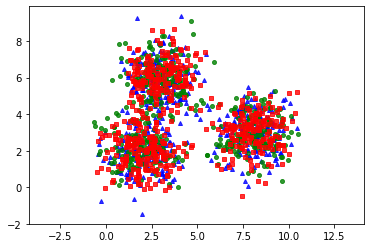

In [ ]:
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]

    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()

kmeans_display(X, original_label)

In [ ]:
def kmeans_init_centers(X, k):
    # randomly pick k rows of X as initial centers
    return X[np.random.choice(X.shape[0], k, replace=False)]

def kmeans_assign_labels(X, centers):
    # calculate pairwise distances btw data and centers
    D = cdist(X, centers) # 3N x 3
    # return index of the closest center
    return np.argmin(D, axis = 1)

def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        # collect all points assigned to the k-th cluster
        Xk = X[labels == k, :]
        # take average
        centers[k,:] = np.mean(Xk, axis = 0)
    return centers

def has_converged(centers, new_centers):
    # return True if two sets of centers are the same
    return (set([tuple(a) for a in centers]) ==
        set([tuple(a) for a in new_centers]))

In [ ]:
def kmeans(X, K):
    centers = [kmeans_init_centers(X, K)]
    labels = []
    it = 0
    while True:
        labels.append(kmeans_assign_labels(X, centers[-1]))
        new_centers = kmeans_update_centers(X, labels[-1], K)
        if has_converged(centers[-1], new_centers):
            break
        centers.append(new_centers)
        it += 1
    return (centers, labels, it)

Centers found by our algorithm:
[[2.99634182 6.03964618]
 [1.97563391 2.01568065]
 [8.0410628  3.02094748]]


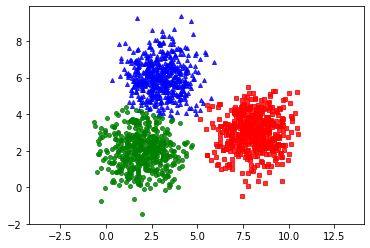

In [ ]:
(centers, labels, it) = kmeans(X, K)
print('Centers found by our algorithm:')
print(centers[-1])

kmeans_display(X, labels[-1])

## Ví dụ 1

In [ ]:
from pyspark import SparkContext
from pyspark.sql import SQLContext

sc = SparkContext('local')
spark = SQLContext(sc)

In [ ]:
from pyspark.ml.linalg import Vectors
data = [(Vectors.dense([0.0, 0.0]), 2.0),
        (Vectors.dense([1.0, 1.0]), 2.0),
        (Vectors.dense([9.0, 8.0]), 2.0),
        (Vectors.dense([8.0, 9.0]), 2.0)]
df = spark.createDataFrame(data, ["features", "weighCol"])
df.show()

+---------+--------+
| features|weighCol|
+---------+--------+
|[0.0,0.0]|     2.0|
|[1.0,1.0]|     2.0|
|[9.0,8.0]|     2.0|
|[8.0,9.0]|     2.0|
+---------+--------+



In [ ]:
from pyspark.ml.clustering import KMeans, KMeansModel

kmeans = KMeans(k=2)
kmeans.setSeed(1)
kmeans.setWeightCol("weighCol")
kmeans.setMaxIter(10)

KMeans_aa8ea6286ad1

In [ ]:
print(kmeans.getMaxIter())
kmeans.clear(kmeans.maxIter)

10


In [ ]:
model = kmeans.fit(df)
print(model.getDistanceMeasure())

euclidean


In [ ]:
model.setPredictionCol("newPrediction")
print(model.predict(df.head().features))

0


In [ ]:
centers = model.clusterCenters()
print(len(centers))
print(centers)

2
[array([0.5, 0.5]), array([8.5, 8.5])]


In [ ]:
transformed = model.transform(df).select("features", "newPrediction")
rows = transformed.collect()
print(rows)

[Row(features=DenseVector([0.0, 0.0]), newPrediction=0), Row(features=DenseVector([1.0, 1.0]), newPrediction=0), Row(features=DenseVector([9.0, 8.0]), newPrediction=1), Row(features=DenseVector([8.0, 9.0]), newPrediction=1)]


In [ ]:
transformed.show()

+---------+-------------+
| features|newPrediction|
+---------+-------------+
|[0.0,0.0]|            0|
|[1.0,1.0]|            0|
|[9.0,8.0]|            1|
|[8.0,9.0]|            1|
+---------+-------------+



In [ ]:
print(rows[0].newPrediction == rows[1].newPrediction)
print(rows[2].newPrediction == rows[3].newPrediction)

True
True


In [ ]:
model.hasSummary
summary = model.summary

print(summary.k)
print(summary.clusterSizes)
print(summary.trainingCost)

2
[2, 2]
4.0


In [ ]:
kmeans_path = "kmeans"
kmeans.save(kmeans_path)

In [ ]:
kmeans2 = KMeans.load(kmeans_path)
print(kmeans2.getK())

2


In [ ]:
model_path = "kmeans_model"
model.save(model_path)
model2 = KMeansModel.load(model_path)
model2.hasSummary

print(model.clusterCenters()[0] == model2.clusterCenters()[0])
print(model.clusterCenters()[1] == model2.clusterCenters()[1])
print(model.transform(df).take(1) == model2.transform(df).take(1))

[ True  True]
[ True  True]
True


## Ví dụ 2

In [ ]:
from pyspark import SparkContext
from pyspark.sql import SQLContext

sc = SparkContext('local')
spark = SQLContext(sc)

In [ ]:
df = spark.read.csv('/content/sample_data/mnist_train_small.csv') \
            .limit(1000)
df.show()

+---+---+---+---+---+---+---+---+---+---+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

row = df.first()
print(type(row))
label, img = row[0], row[1:]

<class 'pyspark.sql.types.Row'>


In [ ]:
print(label)

6


In [ ]:
img = np.reshape(img, (28, 28)).astype(np.uint8)

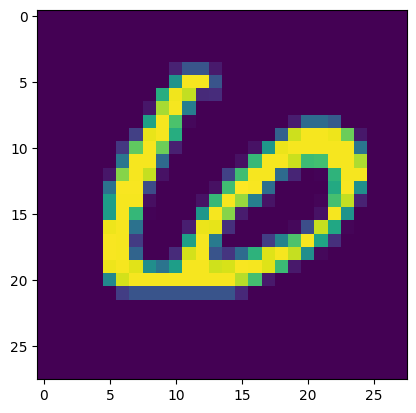

In [ ]:
plt.imshow(img)
plt.show()

In [ ]:
import cv2

cv2.imwrite('test.jpg', img)

True

In [ ]:
df.count()

1000

In [ ]:
from pyspark.sql.functions import col, array
from pyspark.ml.linalg import Vectors

df = df.rdd.map(lambda x: (x[0], Vectors.dense([float(it) for it in x[1:]])))\
           .toDF() \
           .select(col('_1').alias('label'), col('_2').alias('features'))
df.show()

+-----+--------------------+
|label|            features|
+-----+--------------------+
|    6|[0.0,0.0,0.0,0.0,...|
|    5|[0.0,0.0,0.0,0.0,...|
|    7|[0.0,0.0,0.0,0.0,...|
|    9|[0.0,0.0,0.0,0.0,...|
|    5|[0.0,0.0,0.0,0.0,...|
|    2|[0.0,0.0,0.0,0.0,...|
|    0|[0.0,0.0,0.0,0.0,...|
|    6|[0.0,0.0,0.0,0.0,...|
|    5|[0.0,0.0,0.0,0.0,...|
|    5|[0.0,0.0,0.0,0.0,...|
|    2|[0.0,0.0,0.0,0.0,...|
|    7|[0.0,0.0,0.0,0.0,...|
|    7|[0.0,0.0,0.0,0.0,...|
|    6|[0.0,0.0,0.0,0.0,...|
|    8|[0.0,0.0,0.0,0.0,...|
|    9|[0.0,0.0,0.0,0.0,...|
|    3|[0.0,0.0,0.0,0.0,...|
|    5|[0.0,0.0,0.0,0.0,...|
|    7|[0.0,0.0,0.0,0.0,...|
|    6|[0.0,0.0,0.0,0.0,...|
+-----+--------------------+
only showing top 20 rows



In [ ]:
from pyspark.ml.clustering import KMeans, KMeansModel

kmeans = KMeans(k=10)
kmeans.setMaxIter(10)

KMeans_b009bc23c2e3

In [ ]:
df.printSchema()

root
 |-- label: string (nullable = true)
 |-- features: vector (nullable = true)



In [ ]:
model = kmeans.fit(df)

In [ ]:
model.setPredictionCol('prediction')
transformed = model.transform(df)
transformed.show()

+-----+--------------------+----------+
|label|            features|prediction|
+-----+--------------------+----------+
|    6|[0.0,0.0,0.0,0.0,...|         7|
|    5|[0.0,0.0,0.0,0.0,...|         6|
|    7|[0.0,0.0,0.0,0.0,...|         8|
|    9|[0.0,0.0,0.0,0.0,...|         7|
|    5|[0.0,0.0,0.0,0.0,...|         6|
|    2|[0.0,0.0,0.0,0.0,...|         2|
|    0|[0.0,0.0,0.0,0.0,...|         3|
|    6|[0.0,0.0,0.0,0.0,...|         2|
|    5|[0.0,0.0,0.0,0.0,...|         6|
|    5|[0.0,0.0,0.0,0.0,...|         6|
|    2|[0.0,0.0,0.0,0.0,...|         2|
|    7|[0.0,0.0,0.0,0.0,...|         9|
|    7|[0.0,0.0,0.0,0.0,...|         9|
|    6|[0.0,0.0,0.0,0.0,...|         2|
|    8|[0.0,0.0,0.0,0.0,...|         4|
|    9|[0.0,0.0,0.0,0.0,...|         4|
|    3|[0.0,0.0,0.0,0.0,...|         8|
|    5|[0.0,0.0,0.0,0.0,...|         8|
|    7|[0.0,0.0,0.0,0.0,...|         4|
|    6|[0.0,0.0,0.0,0.0,...|         5|
+-----+--------------------+----------+
only showing top 20 rows



In [ ]:
transformed.where(col('prediction') == 0) \
           .groupBy('label') \
           .count() \
           .orderBy('count', ascending=False) \
           .show()

+-----+-----+
|label|count|
+-----+-----+
|    1|   74|
|    7|    7|
|    8|    4|
|    9|    2|
|    2|    2|
+-----+-----+



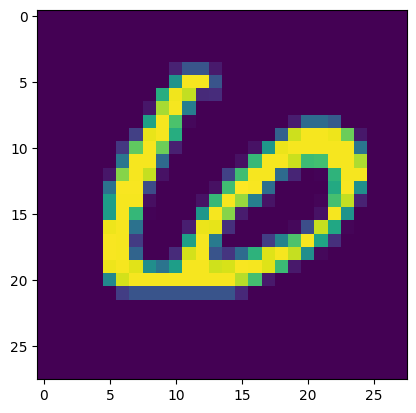

True

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

img = df.first()["features"]
img = np.reshape(img, (28, 28))
plt.imshow(img)
plt.show()
cv2.imwrite('test.jpg', img)

# Hướng dẫn bài tập

## Submission 04a

In [ ]:
!pwd

/content


In [ ]:
from pyspark import SparkContext

sc = SparkContext("local", "4a")

In [ ]:
sc = SparkContext.getOrCreate("local")

In [ ]:
data = sc.textFile('/content/WHO-COVID-19-global.tsv')

In [ ]:
def preprocessLine(x):
  items = x.strip().split('\t')[1:]
  region = items[0]
  values = [float(it) for it in items[1:]]
  return (region, values)

import numpy as np
def sumAll(x, y):
  x = np.array(x)
  y = np.array(y)
  return list(x + y)

!rm -rf result/
data.map(preprocessLine) \
    .reduceByKey(sumAll) \
    .saveAsTextFile('result')

In [ ]:
import numpy as np

a = np.array([1, 2])
b = np.array([2, 3])
print(a+b)

## Submission 04b

In [ ]:
from pyspark import SparkContext
from pyspark.sql import SQLContext

sc = SparkContext.getOrCreate('local')
sqlc = SQLContext(sc)

In [ ]:
df = sqlc.read.option("header", True) \
  .option("delimiter", ",") \
  .option("inferSchema", True) \
  .csv('/content/WHO-COVID-19-global.csv')

df.show()

+--------------------+--------------------+------------------------+----------------------------------------------+-------------------------------------+-----------------------------------------------------------+---------------------------------------+-------------------------+-----------------------------------------------+--------------------------------------+------------------------------------------------------------+----------------------------------------+
|                Name|          WHO Region|Cases - cumulative total|Cases - cumulative total per 100000 population|Cases - newly reported in last 7 days|Cases - newly reported in last 7 days per 100000 population|Cases - newly reported in last 24 hours|Deaths - cumulative total|Deaths - cumulative total per 100000 population|Deaths - newly reported in last 7 days|Deaths - newly reported in last 7 days per 100000 population|Deaths - newly reported in last 24 hours|
+--------------------+--------------------+-------------------

In [ ]:
df.printSchema()

root
 |-- Name: string (nullable = true)
 |-- WHO Region: string (nullable = true)
 |-- Cases - cumulative total: integer (nullable = true)
 |-- Cases - cumulative total per 100000 population: double (nullable = true)
 |-- Cases - newly reported in last 7 days: integer (nullable = true)
 |-- Cases - newly reported in last 7 days per 100000 population: double (nullable = true)
 |-- Cases - newly reported in last 24 hours: integer (nullable = true)
 |-- Deaths - cumulative total: integer (nullable = true)
 |-- Deaths - cumulative total per 100000 population: double (nullable = true)
 |-- Deaths - newly reported in last 7 days: integer (nullable = true)
 |-- Deaths - newly reported in last 7 days per 100000 population: double (nullable = true)
 |-- Deaths - newly reported in last 24 hours: integer (nullable = true)



In [ ]:
dfResutl = df.groupBy('WHO Region') \
             .sum('Cases - cumulative total') \
             .show()

+--------------------+-----------------------------+
|          WHO Region|sum(Cases - cumulative total)|
+--------------------+-----------------------------+
|              Europe|                    249105808|
|     Western Pacific|                     85868508|
|              Africa|                      9298893|
|Eastern Mediterra...|                     23011442|
|               Other|                          764|
|            Americas|                    176342137|
|     South-East Asia|                     60084208|
+--------------------+-----------------------------+



## Submission 05

In [ ]:
df = sqlc.read.csv('/content/data.csv',
                   sep=';', header=True) \
               .select('BillNo', 'Itemname') \
               .rdd \
               .groupByKey() \
               .map(lambda x: (x[0], ','.join([str(it) for it in x[1]]))) \
               .toDF() \
               .withColumnRenamed('_1', 'BillNo') \
               .withColumnRenamed('_2', 'ItemList')

df.show()

+------+--------------------+
|BillNo|            ItemList|
+------+--------------------+
|536365|WHITE HANGING HEA...|
|536366|HAND WARMER UNION...|
|536367|ASSORTED COLOUR B...|
|536368|JAM MAKING SET WI...|
|536369|BATH BUILDING BLO...|
|536370|ALARM CLOCK BAKEL...|
|536371|PAPER CHAIN KIT 5...|
|536372|HAND WARMER RED P...|
|536373|WHITE HANGING HEA...|
|536374|VICTORIAN SEWING ...|
|536375|WHITE HANGING HEA...|
|536376|HOT WATER BOTTLE ...|
|536377|HAND WARMER RED P...|
|536378|JUMBO BAG PINK PO...|
|536380|JAM MAKING SET PR...|
|536381|RETROSPOT TEA SET...|
|536382|INFLATABLE POLITI...|
|536384|WOOD BLACK BOARD ...|
|536385|SET 3 WICKER OVAL...|
|536386|WHITE WIRE EGG HO...|
+------+--------------------+
only showing top 20 rows



# Gợi ý cho đồ án giữa kỳ nào đó

In [ ]:
items = ['a', 'b', 'c', 'd', 'e', 'f']
items.sort()
print(items)

['a', 'b', 'c', 'd', 'e', 'f']


In [ ]:
dd = {}
for i in range(len(items)):
  dd[items[i]] = i
print(dd)

{'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5}


In [ ]:
dd = {it:i for i, it in enumerate(items)}
print(dd)

{'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5}


# Dimensionality Reduction

In [ ]:
from pyspark import SparkContext

sc = SparkContext('local', 'DR')

In [ ]:
from pyspark.mllib.linalg import Vectors
from pyspark.mllib.linalg.distributed import RowMatrix

rows = sc.parallelize([                 # RDD
    Vectors.sparse(5, {1: 1.0, 3: 7.0}),
    Vectors.dense(2.0, 0.0, 3.0, 4.0, 5.0),
    Vectors.dense(4.0, 0.0, 0.0, 6.0, 7.0)
])

mat = RowMatrix(rows)

svd = mat.computeSVD(3, computeU=True)
U = svd.U
s = svd.s
V = svd.V

In [ ]:
import numpy as np

np.set_printoptions(precision=2)
print(np.array(U.rows.collect()))
print(np.array(s))
print(V)

[[-0.39 -0.92 -0.06]
 [-0.53  0.27 -0.8 ]
 [-0.75  0.28  0.59]]
[13.03  5.37  2.53]
DenseMatrix([[-0.31,  0.31,  0.3 ],
             [-0.03, -0.17, -0.02],
             [-0.12,  0.15, -0.95],
             [-0.72, -0.68, -0.02],
             [-0.61,  0.62,  0.06]])


# Recommender System

## Collaborative Filtering

In [ ]:
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.recommendation import ALS
from pyspark.sql import Row

spark = SQLContext(SparkContext('local', 'CF'))

In [ ]:
lines = spark.read.text("drive/MyDrive/tmp/ratings10k.csv").rdd
parts = lines.map(lambda row: row.value.split(","))
ratingsRDD = parts.map(lambda p: Row(userId=int(p[0]), movieId=int(p[1]),
                                     rating=float(p[2]), timestamp=float(p[3])))
ratings = spark.createDataFrame(ratingsRDD)

In [ ]:
ratings.show()

+------+-------+------+-------------+
|userId|movieId|rating|    timestamp|
+------+-------+------+-------------+
|     1|    296|   5.0|1.147880044E9|
|     1|    306|   3.5|1.147868817E9|
|     1|    307|   5.0|1.147868828E9|
|     1|    665|   5.0| 1.14787882E9|
|     1|    899|   3.5| 1.14786851E9|
|     1|   1088|   4.0|1.147868495E9|
|     1|   1175|   3.5|1.147868826E9|
|     1|   1217|   3.5|1.147878326E9|
|     1|   1237|   5.0|1.147868839E9|
|     1|   1250|   4.0|1.147868414E9|
|     1|   1260|   3.5|1.147877857E9|
|     1|   1653|   4.0|1.147868097E9|
|     1|   2011|   2.5|1.147868079E9|
|     1|   2012|   2.5|1.147868068E9|
|     1|   2068|   2.5|1.147869044E9|
|     1|   2161|   3.5|1.147868609E9|
|     1|   2351|   4.5|1.147877957E9|
|     1|   2573|   4.0|1.147878923E9|
|     1|   2632|   5.0|1.147878248E9|
|     1|   2692|   5.0|  1.1478691E9|
+------+-------+------+-------------+
only showing top 20 rows



In [ ]:
(training, test) = ratings.randomSplit([0.8, 0.2])

In [ ]:
als = ALS(userCol="userId",
          itemCol="movieId",
          ratingCol="rating")
model = als.fit(training)

In [ ]:
predictions = model.transform(test)
evaluator = RegressionEvaluator(metricName="rmse", labelCol="rating",
                                predictionCol="prediction")
rmse = evaluator.evaluate(predictions)
print("Root-mean-square error = " + str(rmse))

Root-mean-square error = nan


In [ ]:
# Generate top 10 movie recommendations for each user
userRecs = model.recommendForAllUsers(10)
userRecs.show()

+------+--------------------+
|userId|     recommendations|
+------+--------------------+
|    31|[{909, 4.316601},...|
|    65|[{1287, 5.006938}...|
|    53|[{2243, 5.3845453...|
|    34|[{920, 4.378617},...|
|    28|[{2395, 6.052067}...|
|    26|[{52604, 4.808017...|
|    27|[{2922, 4.9534974...|
|    44|[{50, 5.7461176},...|
|    12|[{2863, 4.8744926...|
|    22|[{5064, 5.987762}...|
|    47|[{2686, 5.0876703...|
|     1|[{2686, 5.2387905...|
|    52|[{4027, 4.9775543...|
|    13|[{2395, 5.143259}...|
|     6|[{2395, 5.077206}...|
|    16|[{2395, 5.095131}...|
|     3|[{5291, 4.9394717...|
|    20|[{2395, 5.676665}...|
|    40|[{2395, 5.2505617...|
|    57|[{68848, 5.154612...|
+------+--------------------+
only showing top 20 rows



In [ ]:
for it in userRecs.first():
  print(it)

31
[Row(movieId=909, rating=4.316600799560547), Row(movieId=3801, rating=3.7783541679382324), Row(movieId=6787, rating=3.7375359535217285), Row(movieId=899, rating=3.65205717086792), Row(movieId=1292, rating=3.5926902294158936), Row(movieId=55765, rating=3.5047097206115723), Row(movieId=1269, rating=3.427597761154175), Row(movieId=412, rating=3.357356071472168), Row(movieId=49007, rating=3.357356071472168), Row(movieId=7121, rating=3.357356071472168)]


In [ ]:
# Generate top 10 user recommendations for each movie
movieRecs = model.recommendForAllItems(10)
movieRecs.show()

+-------+--------------------+
|movieId|     recommendations|
+-------+--------------------+
|   1580|[{49, 5.0077558},...|
|   6620|[{49, 1.7447889},...|
|  54190|[{58, 4.9675364},...|
|    471|[{72, 4.841337}, ...|
|   1591|[{72, 1.9739544},...|
|   1342|[{72, 3.9479089},...|
|   2142|[{69, 2.0460105},...|
|  33722|[{12, 2.9492002},...|
|   3794|[{12, 1.9661336},...|
|   1645|[{72, 3.9479089},...|
|   3175|[{58, 4.5619974},...|
|  68135|[{48, 4.302857}, ...|
|   2366|[{28, 3.7048938},...|
| 175197|[{15, 3.6599078},...|
|   1088|[{9, 4.7020965}, ...|
|   3918|[{14, 3.0727856},...|
|   6658|[{58, 4.853922}, ...|
|   8638|[{28, 4.296291}, ...|
|   1959|[{23, 4.7651267},...|
|    540|[{32, 3.1897814},...|
+-------+--------------------+
only showing top 20 rows



In [ ]:
for it in movieRecs.first():
  print(it)

1580
[Row(userId=49, rating=5.007755756378174), Row(userId=22, rating=4.883993148803711), Row(userId=28, rating=4.774200439453125), Row(userId=8, rating=4.5050787925720215), Row(userId=21, rating=4.480583190917969), Row(userId=2, rating=4.419493675231934), Row(userId=48, rating=4.370579719543457), Row(userId=44, rating=4.2683892250061035), Row(userId=20, rating=4.265716075897217), Row(userId=53, rating=4.236225605010986)]


# Neural Networks

## Regression

In [ ]:
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.ml.regression import LinearRegression

spark = SparkContext.getOrCreate('local')
spark = SQLContext(spark)

In [ ]:
# Load training data
! wget 'https://raw.githubusercontent.com/apache/spark/master/data/mllib/sample_linear_regression_data.txt'
training = spark.read \
            .format("libsvm")\
            .load('sample_linear_regression_data.txt')

--2022-11-06 07:03:25--  https://raw.githubusercontent.com/apache/spark/master/data/mllib/sample_linear_regression_data.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 119069 (116K) [text/plain]
Saving to: ‘sample_linear_regression_data.txt’

sample_linear_regre 100%[===================>] 116.28K  --.-KB/s    in 0.02s   

2022-11-06 07:03:25 (5.36 MB/s) - ‘sample_linear_regression_data.txt’ saved [119069/119069]



In [ ]:
lr = LinearRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8)
lrModel = lr.fit(training)

In [ ]:
# Print the coefficients and intercept for linear regression
print("Coefficients: %s" % str(lrModel.coefficients))
print("Intercept: %s" % str(lrModel.intercept))

Coefficients: [0.0,0.32292516677405936,-0.3438548034562218,1.9156017023458414,0.05288058680386263,0.765962720459771,0.0,-0.15105392669186682,-0.21587930360904642,0.22025369188813426]
Intercept: 0.1598936844239736


In [ ]:
# Summarize the model over the training set and print out some metrics
trainingSummary = lrModel.summary
print("numIterations: %d" % trainingSummary.totalIterations)
print("objectiveHistory: %s" % str(trainingSummary.objectiveHistory))

numIterations: 6
objectiveHistory: [0.49999999999999994, 0.4967620357443381, 0.4936361664340463, 0.4936351537897608, 0.4936351214177871, 0.49363512062528014, 0.4936351206216114]


In [ ]:
trainingSummary.residuals.show()
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

+--------------------+
|           residuals|
+--------------------+
|  -9.889232683103197|
|  0.5533794340053554|
|  -5.204019455758823|
| -20.566686715507508|
|    -9.4497405180564|
|  -6.909112502719486|
|  -10.00431602969873|
|   2.062397807050484|
|  3.1117508432954772|
| -15.893608229419382|
|  -5.036284254673026|
|   6.483215876994333|
|  12.429497299109002|
|  -20.32003219007654|
| -2.0049838218725005|
| -17.867901734183793|
|   7.646455887420495|
| -2.2653482182417406|
|-0.10308920436195645|
|  -1.380034070385301|
+--------------------+
only showing top 20 rows

RMSE: 10.189077
r2: 0.022861


## Classification

In [ ]:
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.ml.regression import LinearRegression

spark = SparkContext.getOrCreate('local')
spark = SQLContext(spark)

In [ ]:
! wget 'https://raw.githubusercontent.com/apache/spark/master/data/mllib/sample_multiclass_classification_data.txt'

--2022-11-06 07:07:05--  https://raw.githubusercontent.com/apache/spark/master/data/mllib/sample_multiclass_classification_data.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6953 (6.8K) [text/plain]
Saving to: ‘sample_multiclass_classification_data.txt’

sample_multiclass_c 100%[===================>]   6.79K  --.-KB/s    in 0s      

2022-11-06 07:07:05 (46.6 MB/s) - ‘sample_multiclass_classification_data.txt’ saved [6953/6953]



In [ ]:
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Load training data
data = spark.read \
          .format("libsvm")\
          .load("sample_multiclass_classification_data.txt")

# Split the data into train and test
splits = data.randomSplit([0.6, 0.4], 1234)
train = splits[0]
test = splits[1]

# specify layers for the neural network:
# input layer of size 4 (features), two intermediate of size 5 and 4
# and output of size 3 (classes)
layers = [4, 5, 4, 3]

# create the trainer and set its parameters
trainer = MultilayerPerceptronClassifier(maxIter=100,
                                         layers=layers,
                                         blockSize=128,
                                         seed=1234)

# train the model
model = trainer.fit(train)

In [ ]:
# compute accuracy on the test set
result = model.transform(test)
predictionAndLabels = result.select("prediction", "label")
evaluator = MulticlassClassificationEvaluator(metricName="accuracy")
print("Test set accuracy = " + str(evaluator.evaluate(predictionAndLabels)))

Test set accuracy = 0.9523809523809523


# Test

In [ ]:
import numpy as np

In [ ]:
data_path = '/content/drive/MyDrive/MMDS-data/data.csv'

In [ ]:
data = sc.textFile(data_path)
header = data.first()
true_data = data.filter(lambda x: x != header)

In [ ]:
def sumAll(member_and_day, item):
  x = np.array(member_and_day)
  y = np.array(item)
  return list(x+y)

In [ ]:
def preprocessLine(x):
  items = x.strip().split(',')
  items = [items[i] for i in (0, 1, 2)]
  member_number = items[0]
  itemDescription = items[2]
  item = [1]
  day = items[1]
  member_and_day = member_number + "," + day
  return (member_and_day, item)

In [ ]:
! rm -rf 'counters_day'

items = true_data.map(preprocessLine) \
                 .reduceByKey(sumAll) \
                 .map(lambda x: (x[0].split(',')[0], x[0].split(',')[1], int(x[1][0]))) \
                 .saveAsTextFile('counters_day')

In [ ]:
def preprocessLine(x):
  items = x.strip().split(',')
  items = [items[i] for i in (0, 1, 2)]
  member_number = items[0]
  itemDescription = items[2]
  date = items[1]
  member_and_date = member_number + "," + date
  return (member_and_date, itemDescription)

def reconstruct(complete_list):
  member_and_date = complete_list[0]
  member,date = member_and_date.split(',')
  itemDescription = list(complete_list[1])

  return member, date, itemDescription

items = true_data.map(preprocessLine) \
        .groupByKey() \
        .map(reconstruct)

In [ ]:
header = sc.parallelize('Member_number;Date;itemDescription')
save_data = items.map(lambda x: x[0] + ';' + x[1] + ';' + ','.join(x[2])) \
            .saveAsTextFile('ItemList')

In [ ]:
df = sqlc.read.option("delimiter", ";") \
        .csv('ItemList/part-00000',
        header=True)

df.show()

+----+----------+--------------------+
|1249|01/01/2014| citrus fruit,coffee|
+----+----------+--------------------+
|1381|01/01/2014|           curd,soda|
|1440|01/01/2014|other vegetables,...|
|1659|01/01/2014|specialty chocola...|
|1789|01/01/2014|hamburger meat,ca...|
|1922|01/01/2014|tropical fruit,ot...|
|2226|01/01/2014|sausage,bottled w...|
|2237|01/01/2014|bottled water,Ins...|
|2351|01/01/2014|cleaner,shopping ...|
|2542|01/01/2014|sliced cheese,bot...|
|2610|01/01/2014|hamburger meat,bo...|
|2709|01/01/2014|yogurt,frozen veg...|
|2727|01/01/2014|hamburger meat,fr...|
|2943|01/01/2014|whole milk,flower...|
|2974|01/01/2014|berries,whipped/s...|
|3681|01/01/2014|onions,whipped/so...|
|3797|01/01/2014|  waffles,whole milk|
|3942|01/01/2014|other vegetables,...|
|3956|01/01/2014|yogurt,shopping b...|
|4260|01/01/2014|    soda,brown bread|
|4942|01/01/2014|butter,frozen veg...|
+----+----------+--------------------+
only showing top 20 rows

